# Homework 2

## Apartment prices
In order to analyze the csv-file we start of by importing pandas and use the built in csv-reader.

In [1]:
import pandas as pd

df = pd.read_csv("Booli_sold.csv")

In order to get an overview of the file we print the columns.

In [2]:
print(df.columns)

Index(['listPrice', 'rent', 'livingArea', 'rooms', 'published',
       'constructionYear', 'objectType', 'booliId', 'soldDate', 'soldPrice',
       'soldPriceSource', 'url', 'floor', 'additionalArea', 'apartmentNumber',
       'plotArea', 'location.address.streetAddress',
       'location.position.latitude', 'location.position.longitude',
       'location.position.isApproximate', 'location.region.municipalityName',
       'location.region.countyName', 'location.distance.ocean', 'source.name',
       'source.id', 'source.type', 'source.url'],
      dtype='object')


### Top 5 most expensive apartments (ppsqm)

Since the price per square meter (ppsqm) is a function of the the living area and the sold price we create a new column called 'ppsqm' and for convenience round the number of decimals to 3.

In [3]:
df['ppsqm'] = round(df['soldPrice'] / df['livingArea'], 3)

We proceed to sort the rows in descending order based on the ppsqm and study the top adresses.

In [4]:
df_sorted = df.sort_values(by='ppsqm', ascending=False)
sorted_filtered = df_sorted[['location.address.streetAddress','ppsqm','soldPrice']]
print(sorted_filtered)

    location.address.streetAddress       ppsqm  soldPrice
67                   Ekhagsvägen 8  104166.667    2500000
50                   Ekhagsvägen 8  102083.333    2450000
54                  Ekhagsvägen 10  100000.000    2300000
34                 Torphagsvägen 4   88400.000    2210000
55                 Docentbacken 1B   85501.859    2300000
..                             ...         ...        ...
93                   Ekhagsvägen 5   39230.769    3570000
141                  Ekhagsvägen 6   37246.377    2570000
146                 Docentbacken 5   35714.286    3500000
151                Docentbacken 13   35714.286    2250000
102                  Ekhagsvägen 5         NaN    3135000

[158 rows x 3 columns]


We then focus only on the top 5 most expensive adresses. In order to create a neat table we change the name of the columns. For reference we also include the total sold price for the apartment.

In [5]:
top_five = df_sorted.head(5)
top_five_table = top_five[['location.address.streetAddress','ppsqm','soldPrice']]
top_five_table = top_five_table.rename(columns={
    'location.address.streetAddress' : 'Address',
    'ppsqm' : 'Price per sqm',
    'soldPrice' : 'Sold Price'})
print(top_five_table)

            Address  Price per sqm  Sold Price
67    Ekhagsvägen 8     104166.667     2500000
50    Ekhagsvägen 8     102083.333     2450000
54   Ekhagsvägen 10     100000.000     2300000
34  Torphagsvägen 4      88400.000     2210000
55  Docentbacken 1B      85501.859     2300000


### Average price per square meter

In order to calculate the average price we simply sum the ppsqm for each property and divide by the number of properties in the file.

### An interesting observation

When we study the complete list of adresses sorted by ppsqm we notice that the two most expensive adresses (Ekhagsvägen 8 and 10) are located on the same street and relatively close to adresses that appear in the bottom five most expensive, also on Ekhagsvägen, that is (Ekhagsvägen 5 and 6). It is strange that the most expensive and least expensive apartments are so close to each other on the same street. Especially because we are considering the price per square meter and not total price. 

In [6]:
average_ppsqm = round(df['ppsqm'].sum() / len(df), 3)
print(average_ppsqm)

58387.488


We conclude the average price per square meter in Ekhagen to be 58387 kr.

## The swedish election of 2018

### Total number valid votes

We start of by reading the csv-file with pandas with an extra argument changing the seperator to a semicolon and get ourselves an overview  of the columns.

In [7]:
df = pd.read_csv('2018_R_per_kommun.csv', sep=';')
print(df.columns)

Index(['LÄNSKOD', 'KOMMUNKOD', 'LÄNSNAMN', 'KOMMUNNAMN', 'M', 'C', 'L', 'KD',
       'S', 'V', 'MP', 'SD', 'FI', 'AfS', 'BASIP', 'CSIS', 'DD', 'DjuP', 'EAP',
       'ENH', 'FHS', 'Gup', 'INI', 'KLP', 'KrVP', 'LPo', 'MED', 'NMR', 'NORRP',
       'NYREF', 'PP', 'RNP', 'S-FRP', 'SKP', 'SKÅ', 'TRP', 'VL-S', 'ÖVR',
       'OGEJ', 'BLANK', 'OG', 'RÖSTER GILTIGA', 'RÖSTANDE', 'RÖSTBERÄTTIGADE',
       'VALDELTAGANDE'],
      dtype='object')


The valid votes are located in a column of its own and we are only interested in the municipalities located in Stockholms region and so we proceed to sum the votes of all municipalities in Stockholms region.

In [8]:
valid_votes_sthlm = df.loc[df['LÄNSNAMN'] == 'Stockholms län', ['RÖSTER GILTIGA']].sum()
print(valid_votes_sthlm)

RÖSTER GILTIGA    1426237
dtype: int64


We count a total of 1426237 valid votes.

### Social democratic party percentages

We sort by the percentages in the 'S' column of the file and filter based on the name of the municipality.

In [9]:
sorted_df = df.sort_values(by='S', ascending=False)
municipal_S_votes = df.filter(items=['KOMMUNNAMN', 'S']).sort_values(by='S',  ascending=False)
print(municipal_S_votes)

     KOMMUNNAMN      S
14     Danderyd   8,04
188    Munkfors  52,18
286       Piteå  47,48
196     Hagfors  47,46
279   Överkalix  46,68
..          ...    ...
22      Vaxholm  16,37
133  Kungsbacka  16,32
13         Täby  13,99
21      Lidingö  12,35
98     Vellinge  10,58

[290 rows x 2 columns]


We see that Munkfors is in the top percentage of social democratic voters.

### Highest participation municipalities

We note that voting participation is a column of its own 'VALDELTAGANDE' and so we filter the data frame based on municipality & voting participation and sort in descending order. We then choose the top 3.

In [10]:
top_participants = df.filter(items=
                             ['KOMMUNNAMN', 'VALDELTAGANDE']).sort_values(by=
                                                                          'VALDELTAGANDE',
                                                                          ascending=False)
top_3_participants = top_participants[0:3]
print(top_3_participants)

    KOMMUNNAMN VALDELTAGANDE
103      Lomma         93,86
59        Habo         93,35
98    Vellinge         93,13


We can see that Lomma, Habo and Vellinge has the highest voting participation percentage.

## Stroke data

We read the csv-file and print the columns of the dataframe.

In [11]:
df = pd.read_csv('stroke-data.csv')
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


We decide to investigate the relationship between age and stroke percentage. We group by age and sum the stroke occurences for each age. We then divide that number by total number of people in the age group to get the fraction and multiply by a hundred to represent the fraction as a percentage.

In [12]:
age_stroke = (df.groupby('age')['stroke'].sum() / df['age'].value_counts()) * 100
print(age_stroke)

age
0.08      0.000000
0.16      0.000000
0.24      0.000000
0.32      0.000000
0.40      0.000000
           ...    
78.00    20.588235
79.00    20.000000
80.00    24.285714
81.00    23.333333
82.00    16.071429
Length: 104, dtype: float64


Since the output is a series we change it back into a dataframe and rename the columns appropriately.

In [13]:
age_stroke = age_stroke.reset_index()
age_stroke.columns = ['age', 'stroke percent']
print(age_stroke)

       age  stroke percent
0     0.08        0.000000
1     0.16        0.000000
2     0.24        0.000000
3     0.32        0.000000
4     0.40        0.000000
..     ...             ...
99   78.00       20.588235
100  79.00       20.000000
101  80.00       24.285714
102  81.00       23.333333
103  82.00       16.071429

[104 rows x 2 columns]


In order to plot the dataframe we import seaborn and matplotlib.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

We now proceed to create a plot and choose a scatterplot to visualise the relationship.

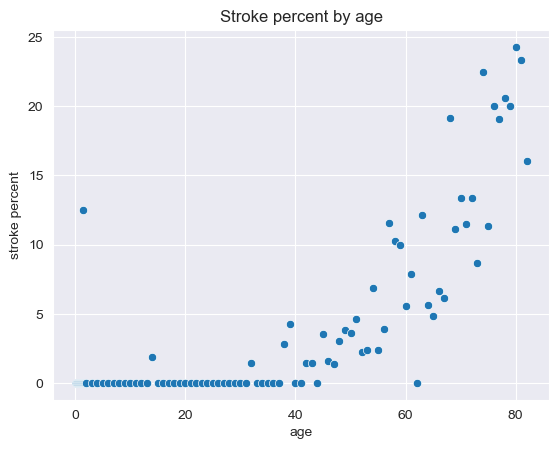

In [24]:
sns.set_style("darkgrid")
plt.figure()
sns.scatterplot(data=age_stroke, x='age', y='stroke percent')
plt.title('Stroke percent by age')
plt.show()

Based on the plot it seems that the stroke percentage increases as age increases.